In [2]:
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns sns.set(style="darkgrid")


df = pd.read_csv('fortune500.csv')
df.head()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1


In [3]:
df.columns = ['year', 'rank', 'company', 'revenue', 'profit']

len(df)

25500

In [4]:
non_numberic_profits = df.profit.str.contains('[^0-9.-]')
df.loc[non_numberic_profits].head()

,year,rank,company,revenue,profit
228,1955,229,Norton,135.0,N.A.
290,1955,291,Schlitz Brewing,100.0,N.A.
294,1955,295,Pacific Vegetable Oil,97.9,N.A.
296,1955,297,Liebmann Breweries,96.0,N.A.
352,1955,353,Minneapolis-Moline,77.4,N.A.


In [10]:
group_by_year = df.loc[:, ['year', 'revenue', 'profit']].groupby('year')
group_by_year.head()

,year,revenue,profit
0,1955,9823.5,806
1,1955,5661.4,584.8
2,1955,3250.4,195.4
3,1955,2959.1,212.6
4,1955,2510.8,19.1
...,...,...,...
25000,2005,288189.0,10267
25001,2005,270772.0,25330
25002,2005,193517.0,2805
25003,2005,172233.0,3487


In [11]:
avgs = group_by_year.mean()
avgs.head()

,revenue
year,
1955,273.5660
1956,322.7970
1957,348.6130
1958,376.6244
1959,353.6618


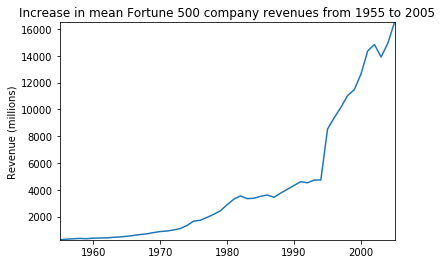

In [15]:
x = avgs.index
y1 = avgs.revenue

def plot(x, y, ax, title, y_label):
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.plot(x, y)
    ax.margins(x=0, y=0)
    
fig, ax = plt.subplots()
plot(x, y1, ax, 'Increase in mean Fortune 500 company revenues from 1955 to 2005', 'Revenue (millions)')

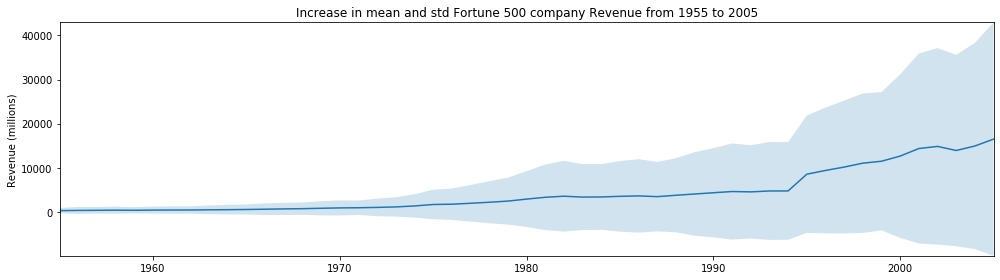

In [21]:
def plot_with_std(x, y, stds, ax, title, y_label):
    ax.fill_between(x, y - stds, y + stds, alpha=0.2)
    plot(x, y, ax, title, y_label)
    
fig, (ax1) = plt.subplots(ncols=1)
title = 'Increase in mean and std Fortune 500 company %s from 1955 to 2005'
stds1 = group_by_year.std().revenue.values
plot_with_std(x, y1.values, stds1, ax1, title % 'Revenue', 'Revenue (millions)')
fig.set_size_inches(14, 4)
fig.tight_layout()